# Analysis of selected funds

In [19]:
import feather

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import sparse

In [56]:
path = '../data/processed/holdings_summary_s.feather'
#path = '../data/interim/holdings_summary_total.feather'
info_df = feather.read_dataframe(path)

In [57]:
info_df.sample(5)

,port_no,report_dt,lipper_class,cap_class,style_class,fund_no
38368,1022907,2016-10-31,MLGE,M,G,26478.0
131651,1028287,2011-05-31,MLCE,M,C,39062.0
82960,1025385,2010-12-31,MLCE,M,C,31384.0
90492,1025759,2017-07-31,LCGE,L,G,29055.0
123793,1027605,2017-06-30,SCGE,S,G,17241.0


## Number of unique port_nos and fund_nos

In [58]:
print(info_df['port_no'].nunique())
print(info_df['fund_no'].nunique())

4259
4203


## Number of unique funds per year

#### Something seems odd
Break in 2009 not clear

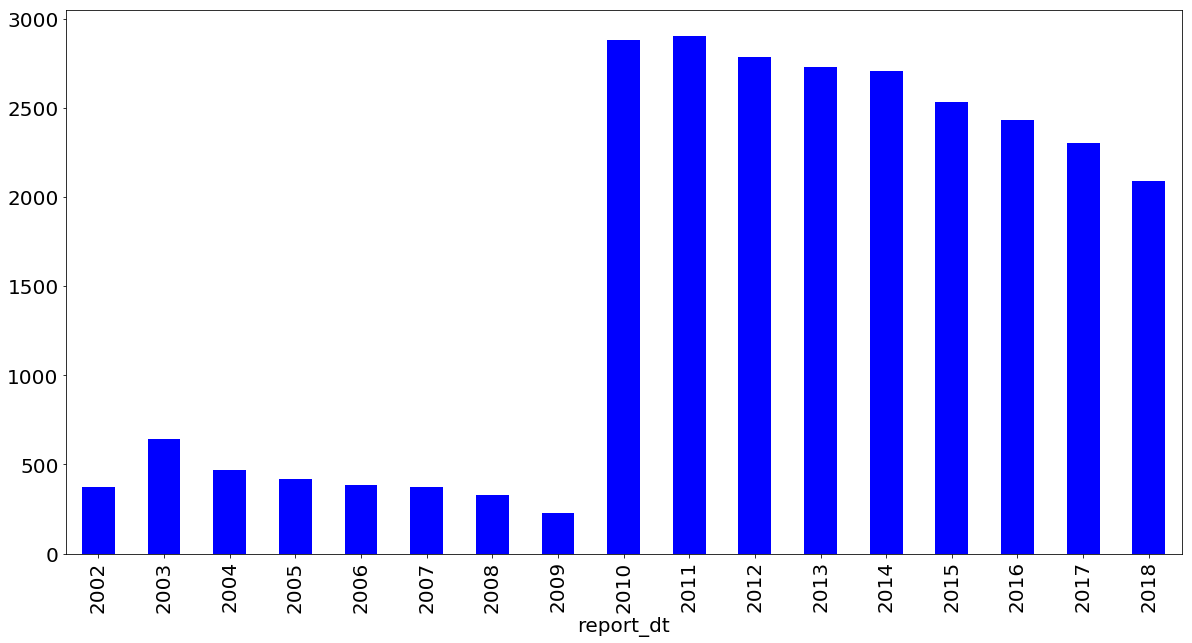

In [59]:
# Analysis of selected funds

## Distribution by date(info_df["report_dt"]
(info_df["port_no"]
    .groupby([
         info_df["report_dt"].dt.year,
#         info_df["report_dt"].dt.month
     ])
     .nunique()
     .plot(kind="bar",
           color = 'b',
          figsize=(20,10)))

## Distribution by number of observations per fund 

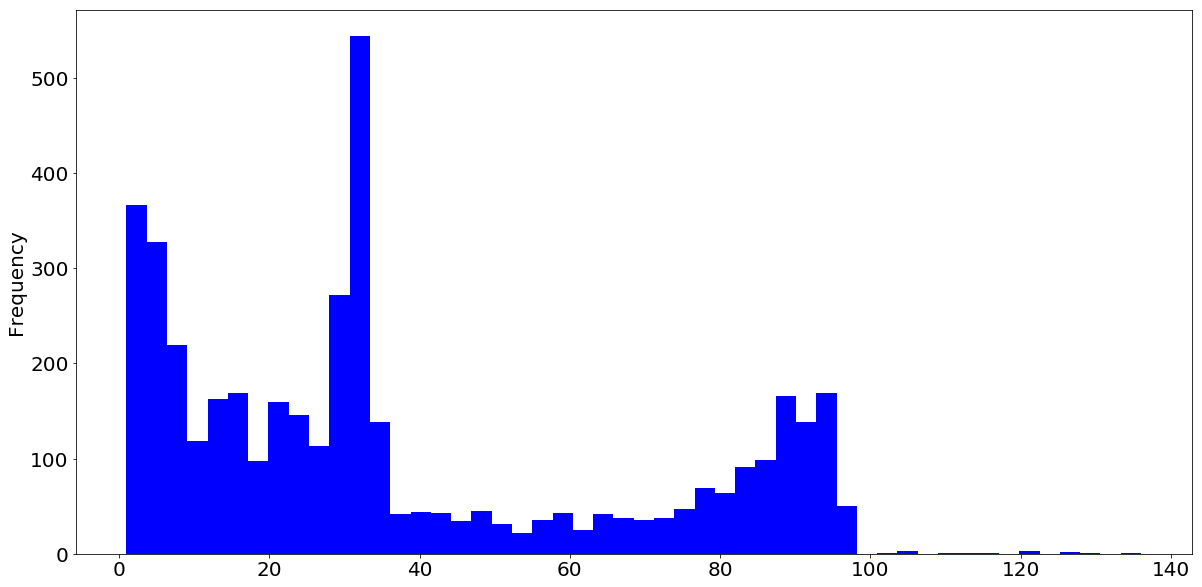

In [60]:
(info_df["port_no"]
     .groupby([
         info_df["port_no"],
     ])
     .count()
     .plot(kind="hist",
           bins = 50,
           color = 'b',
           figsize=(20,10)))

## Distribution by lipper_class

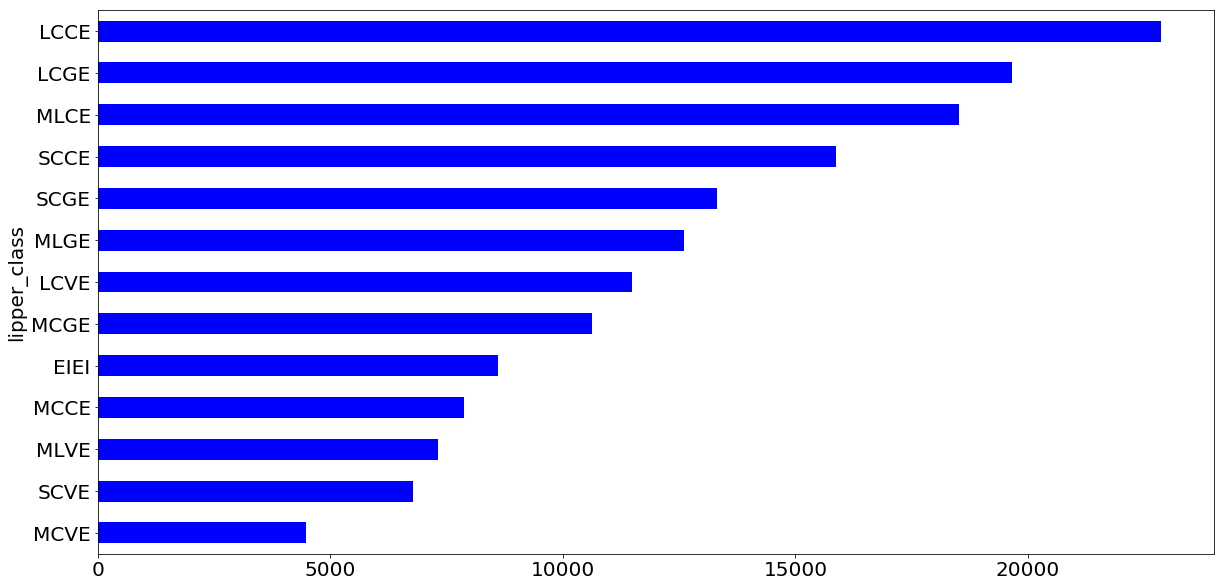

In [61]:
(info_df["port_no"]
     .groupby([
         info_df["lipper_class"],
     ])
     .count()
     .sort_values()
     .plot(kind="barh",
           color = 'b',
           figsize=(20,10)))

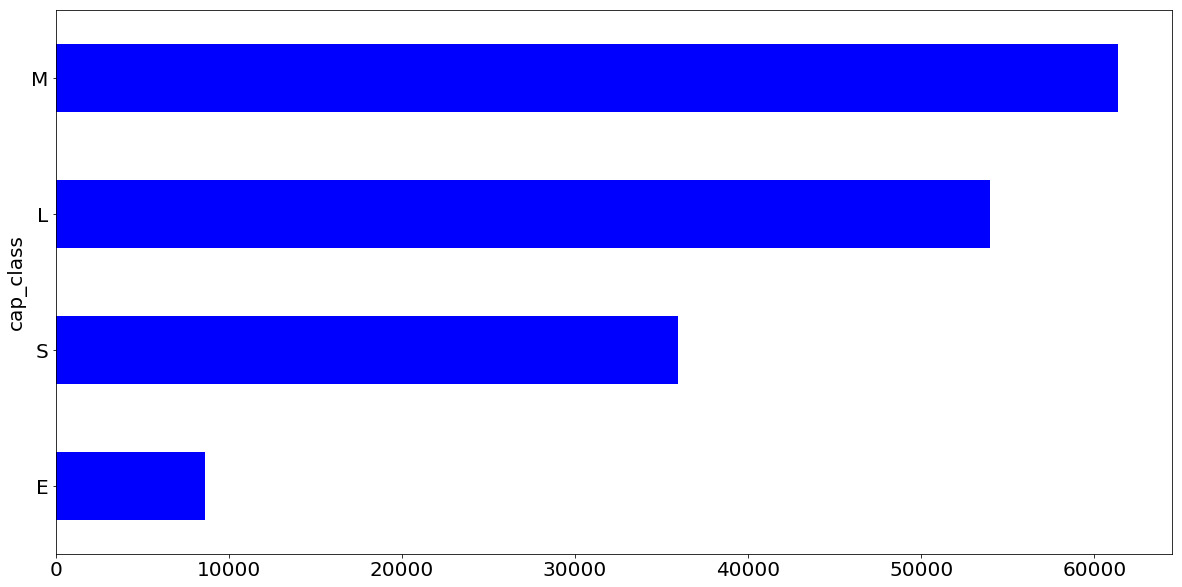

In [62]:
(info_df["port_no"]
     .groupby([
         info_df["cap_class"],
     ])
     .count()
     .sort_values()
     .plot(kind="barh",
           color = 'b',
           figsize=(20,10)))

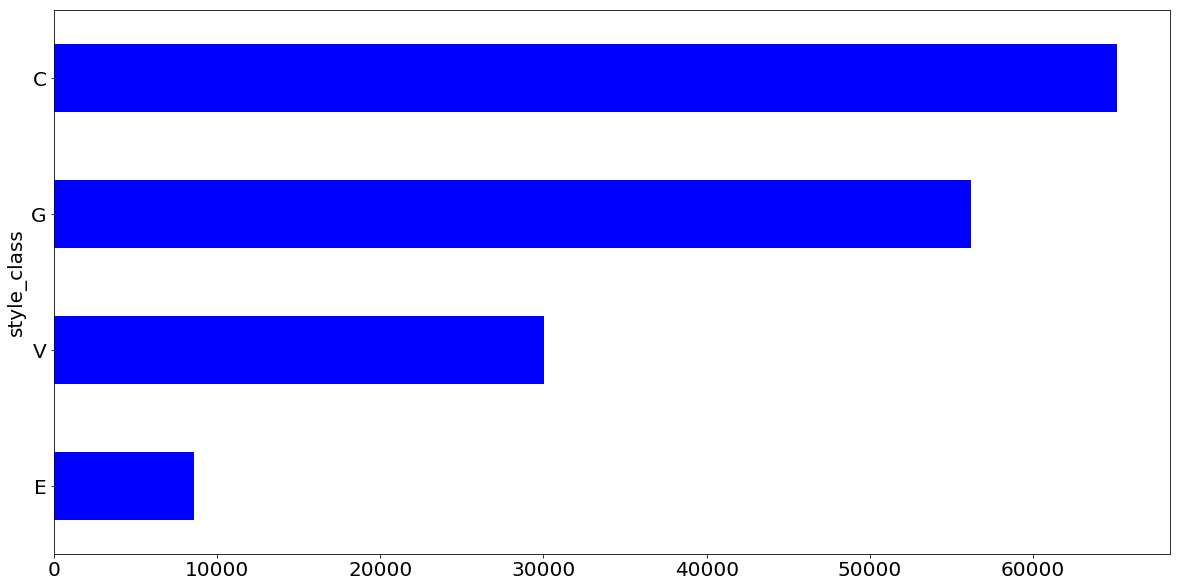

In [63]:
(info_df["port_no"]
     .groupby([
         info_df["style_class"],
     ])
     .count()
     .sort_values()
     .plot(kind="barh",
           color = 'b',
           figsize=(20,10)))

## How often do lipper_classes change?


In [64]:
plt.rc('font', size=20)          # controls default text sizes

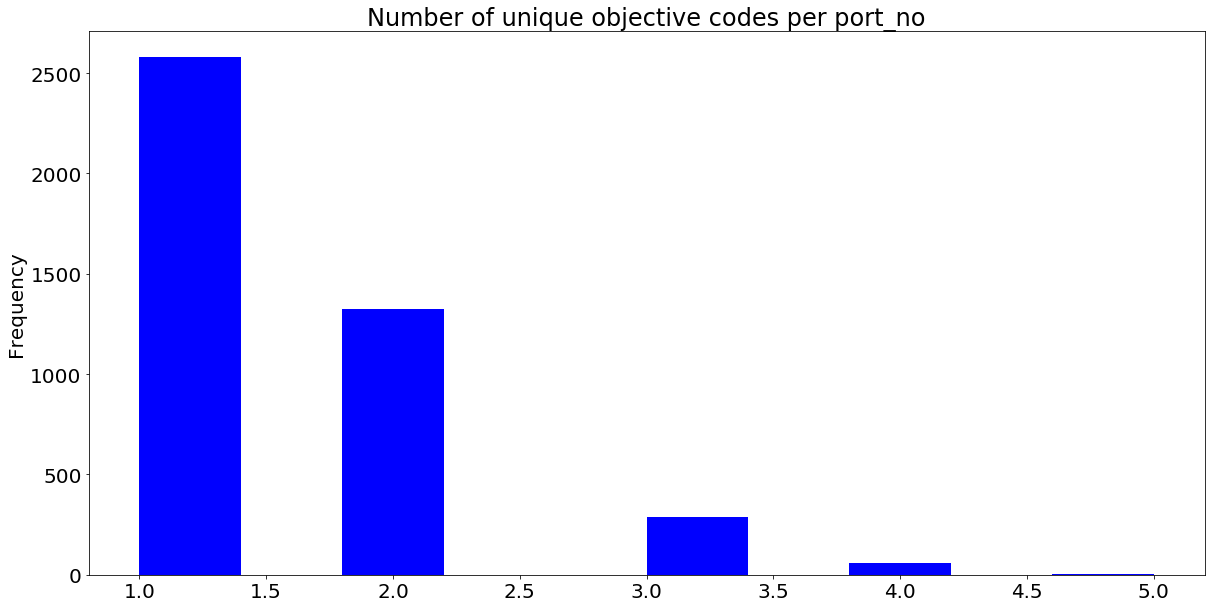

In [65]:
obj_per_portno = info_df[['port_no','lipper_class']]
ax = (obj_per_portno["lipper_class"]
    .groupby([
        obj_per_portno["port_no"]
    ])
    .nunique()
    .sort_values()
    .plot(kind="hist",
          color = 'b',
          bins = 10,
          figsize=(20,10),
          title='Number of unique objective codes per port_no')
)

### Check importance of port_no map

In [66]:
path = '../data/raw/portno_map.feather'
portno_map = feather.read_dataframe(path)

In [67]:
check = portno_map.groupby(['crsp_fundno','crsp_portno']).count()['begdt']

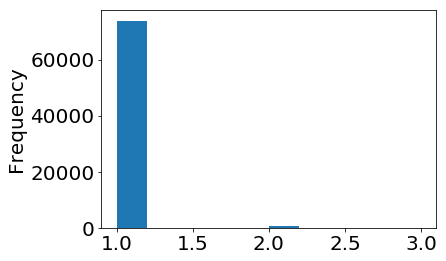

In [68]:
check.plot(kind = 'hist')

#### Only minimal importnace -> however should be implemented later